In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:

# Load the dataset
file_path = "datasetupdated.csv"  # Ensure the file is in the correct path
df = pd.read_csv(file_path)



In [4]:

# Prepare Data for ARIMAX
df['ds'] = pd.to_datetime(df['YEAR'], format='%Y')
df = df[['ds', 'CasesReported', 'Total Cases for Investigation (Col.7=Col.4+ Col.5+ Col.6)']].dropna()


In [6]:

# Define train data
y = df['CasesReported']
X = df[['Total Cases for Investigation (Col.7=Col.4+ Col.5+ Col.6)']]


In [7]:

# Train ARIMAX Model
arimax_order = (3, 2, 1)  # Order from previous tuning
arimax_model = ARIMA(y, exog=X, order=arimax_order)
arimax_fit = arimax_model.fit()


C:\Users\sampu\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:

# Future Predictions (5 years)
future_years = pd.date_range(start=df['ds'].max() + pd.DateOffset(years=1), periods=5, freq='YE')
future_exog = np.linspace(X.iloc[-1, 0], X.iloc[-1, 0] * 1.2, num=5).reshape(-1, 1)  # Simulated growth for exog variable
arimax_forecast = arimax_fit.forecast(steps=5, exog=future_exog)



In [20]:

print("Corrected ARIMAX Forecast Values:")
print(arimax_forecast)

Corrected ARIMAX Forecast Values:
270    73.063507
271    88.981294
272    96.589777
273    89.834810
274    92.871616
Name: predicted_mean, dtype: float64


In [12]:
print(future_exog)

[[231.  ]
 [242.55]
 [254.1 ]
 [265.65]
 [277.2 ]]


In [13]:
print(arimax_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          CasesReported   No. Observations:                  270
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -2254.430
Date:                Tue, 04 Feb 2025   AIC                           4520.859
Time:                        01:04:53   BIC                           4542.405
Sample:                             0   HQIC                          4529.513
                                - 270                                         
Covariance Type:                  opg                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Total Cases for Investigation (Col.7=Col.4+ Col.5+ Col.6)     0.4447      0.003    173.333      0.000       0.440   

In [14]:
print("ARIMAX Forecast Values:")
print(arimax_forecast)


ARIMAX Forecast Values:
270    73.063507
271    88.981294
272    96.589777
273    89.834810
274    92.871616
Name: predicted_mean, dtype: float64


In [15]:
print("Future Exogenous Variables (Exog) Used for Forecasting:")
print(future_exog)


Future Exogenous Variables (Exog) Used for Forecasting:
[[231.  ]
 [242.55]
 [254.1 ]
 [265.65]
 [277.2 ]]


In [9]:

# Convert to DataFrame
arimax_df = pd.DataFrame({'ds': future_years, 'yhat_arimax': arimax_forecast})


In [10]:

# Evaluate Model
mae_arimax = mean_absolute_error(y, arimax_fit.fittedvalues)
rmse_arimax = np.sqrt(mean_squared_error(y, arimax_fit.fittedvalues))
print(f'ARIMAX MAE: {mae_arimax:.2f}, RMSE: {rmse_arimax:.2f}')


ARIMAX MAE: 531.53, RMSE: 1095.24


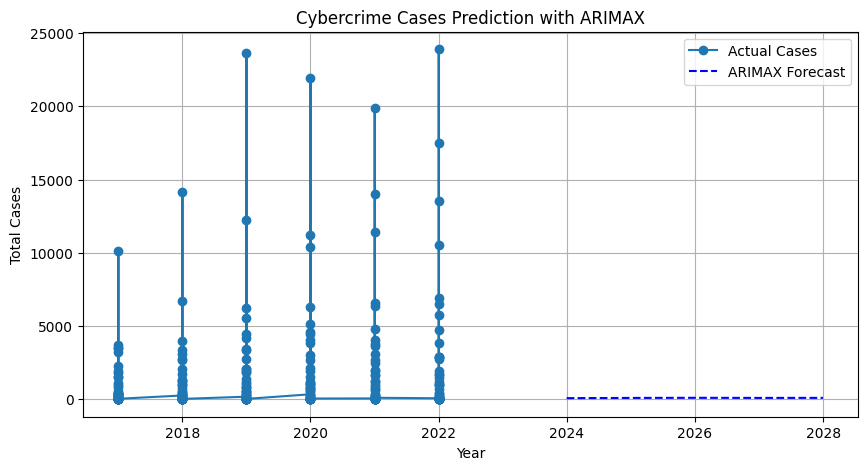

In [11]:

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['CasesReported'], 'o-', label='Actual Cases')
plt.plot(arimax_df['ds'], arimax_df['yhat_arimax'], 'b--', label='ARIMAX Forecast')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Cybercrime Cases Prediction with ARIMAX')
plt.legend()
plt.grid(True)
plt.show()